In [30]:
#Importação das bibliotecas utilizadas
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Biblioteca Multinomial NB
from sklearn.naive_bayes import MultinomialNB

#Biblioteca demandada no exercício
from sklearn.metrics import classification_report

In [31]:
#É instanciado um grupo com 20 assuntos do scikit, que serão utilizados para classificar os documentos em categorias.
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [32]:
#Defino as categorias que serão consideradas. E as que serão consideradas para treinamento e teste.
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [33]:
#Converto o texto em representação numérica. 
cv = CountVectorizer()

#Instancio objeto do classificador Multinomial Naive Bayes
mnb = MultinomialNB()

#Criado um pipeline que utiliza os dados vetorizados no classificador Naive Bayes Multinomial
model = make_pipeline(cv, mnb)

In [34]:
#É treinado o modelo com os dados de treinamento
model.fit(train.data, train.target)

#Validação do modelo com os dados de teste
labels = model.predict(test.data)

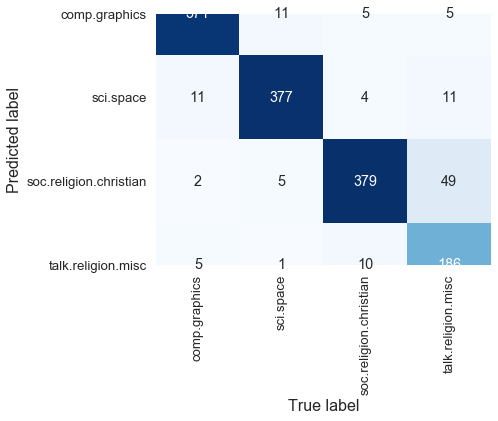

In [35]:
#Plotada a matriz de confusão, que ilustra o desempenho do classificador.
fig = plt.figure(figsize=(6,6))

mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.2)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")

plt.xlabel('True label', fontsize=16)
plt.ylabel('Predicted label', fontsize=16)

plt.savefig('l5ex6.png', dpi=600)
plt.show()

In [36]:
print(classification_report(test.target, labels, target_names=categories))

                        precision    recall  f1-score   support

    talk.religion.misc       0.95      0.95      0.95       389
soc.religion.christian       0.94      0.96      0.95       394
             sci.space       0.87      0.95      0.91       398
         comp.graphics       0.92      0.74      0.82       251

              accuracy                           0.92      1432
             macro avg       0.92      0.90      0.91      1432
          weighted avg       0.92      0.92      0.92      1432

